<h1><b>인공지능개론 3주차 과제<br></b></h1>
<p>컴퓨터공학과 202136038 조성준</p>


---

<h2><b>1. 데이터 로딩</b></h2>

In [18]:
import pandas as pd
# url을 통해 CSV 파일 읽기
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv" #abalone.csv의 url입력
df = pd.read_csv(url)

# 데이터프레임 확인
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [19]:
# 컬렴명 확인
print(df.columns)

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


<h2><b>2. 결측치 확인</b></h2>

In [20]:
# 결측치 확인
print(df.isnull().sum())
# 확인 결과: 결측치가 확인되지않음

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


<h2><b>3. 레이블 확인(imbalanced data)</b></h2>
<li>타겟 변수(class)의 분포를 확인</li>

,count
Rings,
9,689
10,634
8,568
11,487
7,391
12,267
6,259
13,203
14,126


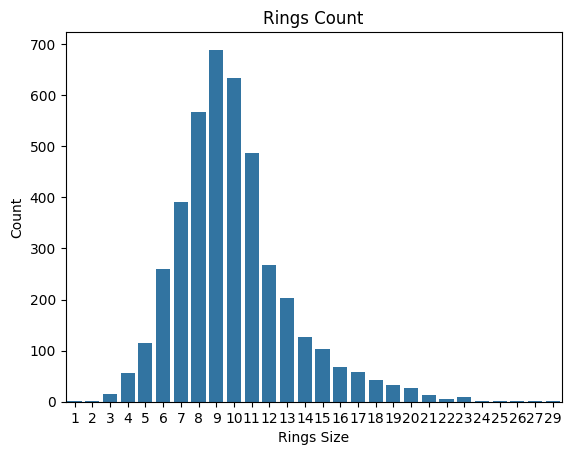

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# 레이블 갯수 확인 (그래프)
sns.countplot(data=df, x="Rings")
plt.xlabel("Rings Size")
plt.ylabel("Count")
plt.title("Rings Count")
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

<h2><b>4. 4가지 분류( LR, DT, RF, SVR )</b></h2>

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 모든 범주형 데이터를 숫자로 변환
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

# 데이터 분리
X = df.drop(columns=["Rings"])  # 특성 데이터
y = df["Rings"]  # 타겟 변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler 적용 (트리 기반 모델 제외)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Encoding & Scaling 완료!")

Encoding & Scaling 완료!



--- Linear Regression ---


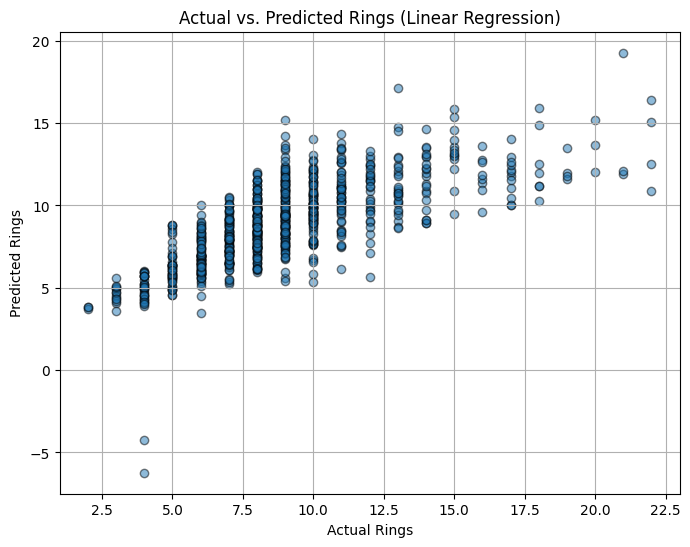

평균제곱근오차 5.033418076150726

--- Decision Tree Regressor ---


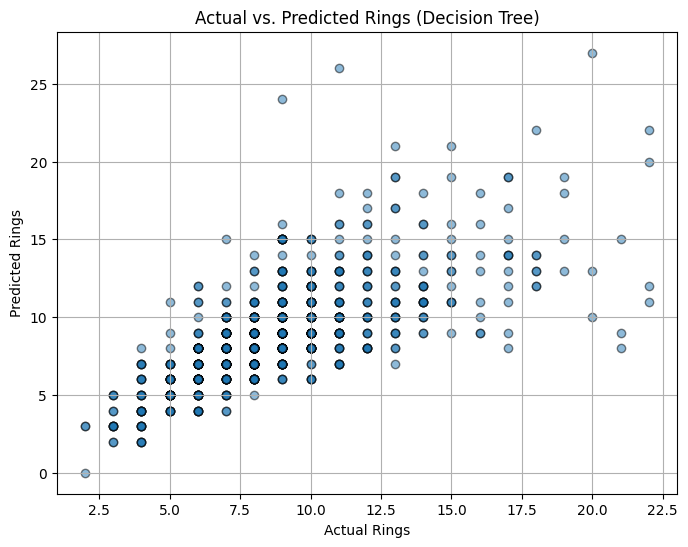

평균제곱근오차 6.51555023923445

--- Random Forest Regressor ---


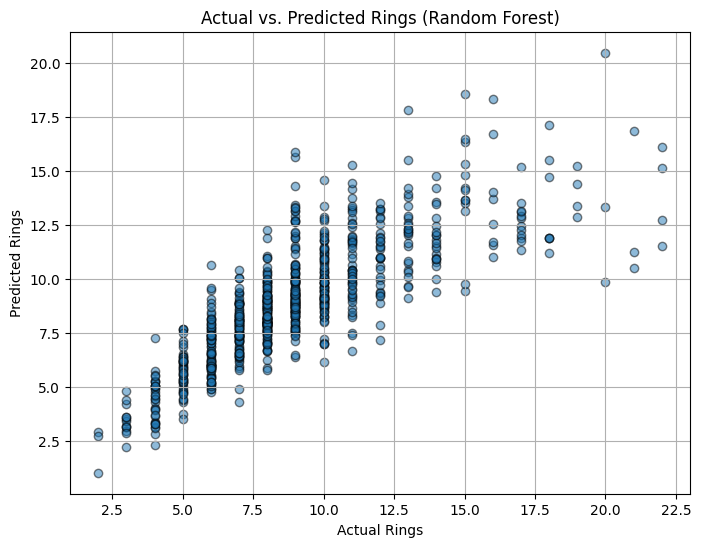

평균제곱근오차 3.7967035885167464

--- SVR ---


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

print ("\n--- Linear Regression ---")
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)
# 실제 값 vs 예측 값 산점도
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ly_preds, alpha=0.5, edgecolors="k")
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title("Actual vs. Predicted Rings (Linear Regression)")
plt.grid(True)
plt.show()
print('평균제곱근오차', mean_squared_error(ly_preds, y_test))


print ("\n--- Decision Tree Regressor ---")
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
dy_preds = model.predict(X_test)
# 실제 값 vs 예측 값 산점도
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dy_preds, alpha=0.5, edgecolors="k")
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title("Actual vs. Predicted Rings (Decision Tree)")
plt.grid(True)
plt.show()
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))


print ("\n--- Random Forest Regressor ---")
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
# 실제 값 vs 예측 값 산점도
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ry_preds, alpha=0.5, edgecolors="k")
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title("Actual vs. Predicted Rings (Random Forest)")
plt.grid(True)
plt.show()
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))



print ("\n--- SVR ---")
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
# 실제 값 vs 예측 값 산점도
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ry_preds, alpha=0.5, edgecolors="k")
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title("Actual vs. Predicted Rings (SVR)")
plt.grid(True)
plt.show()
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))